# Assignment -:Data Analytics

Task:
* Acquire data for Indian region from openAQ (or any other open api) the data is mainly about gases such as PM2.5, PM10, NO2, CO, SO2, Ozone and others. 
* You have to perform all this task using python/R language and make sure the data you fetch is of at least 100 records or more records for a period of time.
* Its upto you that you are fetching the historical air quality data or live
* Get the actual parameters PM2.5, PM10, NO2, CO, SO2, Ozone and region name 
* Perform exploratory data analysis.
* Mine the data using any ML algorithm
* Visualise the results.
* The output of your work will be the python code that we will run and evaluate at our end.

Note: 
1. You have to extract the data through API, not to use already available dataset.
2. This assignment is to evaluate your basic data science skills, kindly read the steps and perform accordingly

### Import all basic  lib necessary for data analysis 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Import all machine learning algo lib and splitting the data

In [2]:


## Split the data 
from sklearn.model_selection import train_test_split 

#Learning done by Sklearn module
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,RandomForestClassifier

### CSV Data Read using pandas.read_csv()

In [3]:
df= pd.read_csv('openaq.csv')

In [4]:
# Top five rows of data 
df.head()

,location,city,country,utc,local,parameter,value,unit,latitude,longitude,attribution
0,"Sanjay Palace, Agra - UPPCB",Agra,IN,2020-02-29T16:15:00Z,2020-02-29T21:45:00+05:30,pm25,61.0,µg/m³,27.198658,78.005981,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."
1,"Sanjay Palace, Agra - UPPCB",Agra,IN,2020-02-29T16:00:00Z,2020-02-29T21:30:00+05:30,so2,16.8,µg/m³,27.198658,78.005981,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."
2,"Sanjay Palace, Agra - UPPCB",Agra,IN,2020-02-29T16:00:00Z,2020-02-29T21:30:00+05:30,no2,55.1,µg/m³,27.198658,78.005981,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."
3,"Sanjay Palace, Agra - UPPCB",Agra,IN,2020-02-29T16:00:00Z,2020-02-29T21:30:00+05:30,pm25,60.0,µg/m³,27.198658,78.005981,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."
4,"Sanjay Palace, Agra - UPPCB",Agra,IN,2020-02-29T16:00:00Z,2020-02-29T21:30:00+05:30,co,1040.0,µg/m³,27.198658,78.005981,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."


### Data Information like find out the null value exists in the dataset or not and index ranges from 0 to 65536

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65536 entries, 0 to 65535
Data columns (total 11 columns):
location       65536 non-null object
city           65536 non-null object
country        65536 non-null object
utc            65536 non-null object
local          65536 non-null object
parameter      65536 non-null object
value          65536 non-null float64
unit           65536 non-null object
latitude       65536 non-null float64
longitude      65536 non-null float64
attribution    65536 non-null object
dtypes: float64(3), object(8)
memory usage: 5.5+ MB


* There is no null value exists in the datset

### Data Description

In [6]:
df.describe()

,value,latitude,longitude
count,65536.000000,6.553600e+04,6.553600e+04
mean,248.583125,2.719866e+01,7.800598e+01
std,661.345882,3.442606e-11,1.561785e-11
min,-3770.000000,2.719866e+01,7.800598e+01
25%,14.900000,2.719866e+01,7.800598e+01
50%,33.000000,2.719866e+01,7.800598e+01
75%,77.600000,2.719866e+01,7.800598e+01
max,9960.000000,2.719866e+01,7.800598e+01


* The data is related to specific city hence latitude and longitude value remain same while parameter value will be changed which is in unit  µg/m³  

In [7]:
# All name of  Columns  define in the dataset
df.columns

Index(['location', 'city', 'country', 'utc', 'local', 'parameter', 'value',
       'unit', 'latitude', 'longitude', 'attribution'],
      dtype='object')

### Actual parameters PM2.5, PM10, NO2, CO, SO2, Ozone and region name

*  Here i am using region India place Agra  and there param  like PM2.5, PM10, NO2, CO, SO2, Ozone are in this region only

In [8]:
print(" Place: ",df['city'].unique())

 Place:  ['Agra']


In [9]:
print("Country: ",df['country'].unique())

Country:  ['IN']


* Country of data India i.e IN

## Visual  Exploratory Data Analysis (EDA)

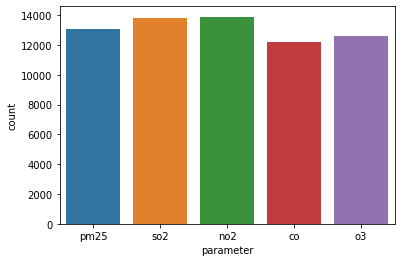

In [10]:
# Count the range of Parameters like PM2.5, PM10, NO2, CO, SO2 and Ozone
sns.countplot(df['parameter'])

### Histogram Chart

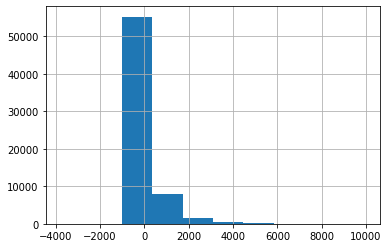

In [11]:
df['value'].hist()

### Seaborn boxplot find the outleirs exists in the dataset in value 

AxesSubplot(0.125,0.125;0.775x0.755)


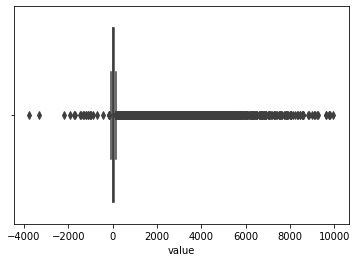

In [12]:
print(sns.boxplot(df['value']))

* Here are many outlayer exists in the dataset After remove some data from negative ranges beyond -2000 and positive after 8000 so that some outleirs remove in our dataset remain will be store in dataformate

AxesSubplot(0.125,0.125;0.775x0.755)


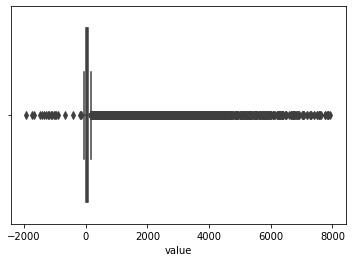

In [13]:
df = df[df['value']>=-2000]
df= df[df['value']<=8000]
print(sns.boxplot(df['value']))

### Rows and col of our dataset after removing outliers present in our data

In [14]:
df.shape

(65504, 11)

* here are the new dataset  after removing some rows in the dataset  some outleir also remove from data

### Maximum Value in value col related to parameter like co,so2,pm25,no2 and o3

In [15]:
df.groupby(df['parameter']).value.max()

parameter
co      7930.0
no2      118.1
o3       407.7
pm25     465.0
so2     1662.7
Name: value, dtype: float64

Text(0, 0.5, 'Sum of value')

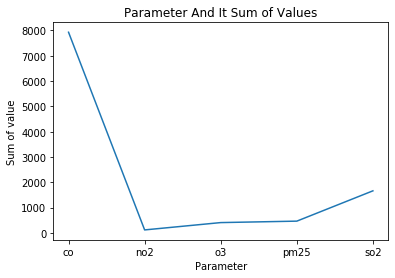

In [16]:
plt.plot(df.groupby(df['parameter']).value.max())
plt.title('Parameter And It Sum of Values')
plt.xlabel('Parameter')
plt.ylabel('Sum of value')

* It is observe that parameter having max value is CO and least is no2 

In [17]:
# all param value
df['parameter'].unique()

array(['pm25', 'so2', 'no2', 'co', 'o3'], dtype=object)

Plotting of each parameter one by one with related to its range of value

Text(0, 0.5, 'Range of value')

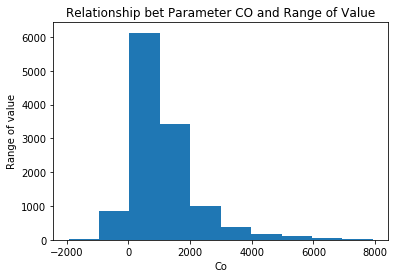

In [18]:
# Plotting of each param of co with relate to its value in  µg/m³
plt.hist(df.loc[df['parameter']=='co']['value'])
plt.title('Relationship bet Parameter CO and Range of Value')
plt.xlabel('Co')
plt.ylabel('Range of value')

Text(0, 0.5, 'Range of value')

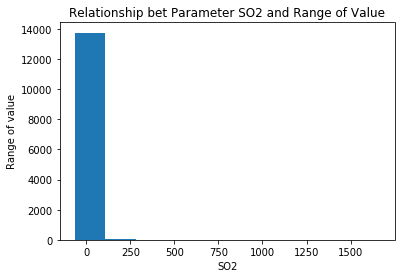

In [19]:
# Plotting of each param of so2 with relate to its value in  µg/m³

plt.hist(df.loc[df['parameter']=='so2']['value'])
plt.title('Relationship bet Parameter SO2 and Range of Value')
plt.xlabel('SO2')
plt.ylabel('Range of value')

Text(0, 0.5, 'Range of value')

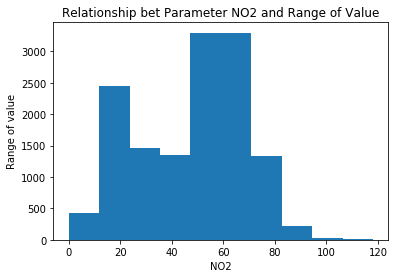

In [20]:
# Plotting of each param of no2 with relate to its value in  µg/m³

plt.hist(df.loc[df['parameter']=='no2']['value'])
plt.title('Relationship bet Parameter NO2 and Range of Value')
plt.xlabel('NO2')
plt.ylabel('Range of value')

Text(0, 0.5, 'Range of value')

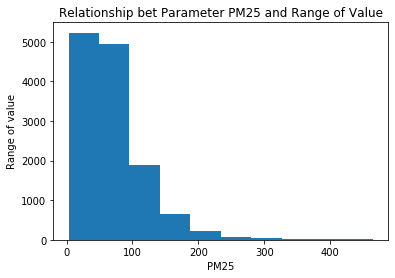

In [21]:
# Plotting of each param of pm25 with relate to its value in  µg/m³

plt.hist(df.loc[df['parameter']=='pm25']['value'])
plt.title('Relationship bet Parameter PM25 and Range of Value')
plt.xlabel('PM25')
plt.ylabel('Range of value')

Text(0, 0.5, 'Range of value')

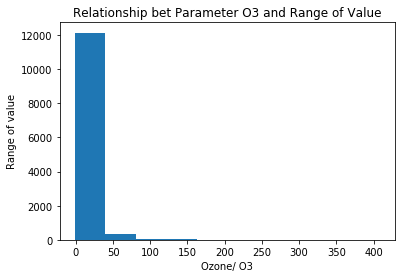

In [22]:
# Plotting of each param of o3 with relate to its value in  µg/m³

plt.hist(df.loc[df['parameter']=='o3']['value'])
plt.title('Relationship bet Parameter O3 and Range of Value')
plt.xlabel('Ozone/ O3')
plt.ylabel('Range of value')

### Date from where it start and end for the datset

In [23]:

print("Date Starting from:",df['local'][65535])
print("Date Ending to: ",df['local'][0])

Date Starting from: 2019-08-23T09:00:00+05:30
Date Ending to:  2020-02-29T21:45:00+05:30


### Convert local col to datetime formate and store in new col date_parsed

In [24]:
df['date_parsed'] = pd.to_datetime(df['local'])
df.head()

,location,city,country,utc,local,parameter,value,unit,latitude,longitude,attribution,date_parsed
0,"Sanjay Palace, Agra - UPPCB",Agra,IN,2020-02-29T16:15:00Z,2020-02-29T21:45:00+05:30,pm25,61.0,µg/m³,27.198658,78.005981,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d...",2020-02-29 21:45:00+05:30
1,"Sanjay Palace, Agra - UPPCB",Agra,IN,2020-02-29T16:00:00Z,2020-02-29T21:30:00+05:30,so2,16.8,µg/m³,27.198658,78.005981,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d...",2020-02-29 21:30:00+05:30
2,"Sanjay Palace, Agra - UPPCB",Agra,IN,2020-02-29T16:00:00Z,2020-02-29T21:30:00+05:30,no2,55.1,µg/m³,27.198658,78.005981,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d...",2020-02-29 21:30:00+05:30
3,"Sanjay Palace, Agra - UPPCB",Agra,IN,2020-02-29T16:00:00Z,2020-02-29T21:30:00+05:30,pm25,60.0,µg/m³,27.198658,78.005981,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d...",2020-02-29 21:30:00+05:30
4,"Sanjay Palace, Agra - UPPCB",Agra,IN,2020-02-29T16:00:00Z,2020-02-29T21:30:00+05:30,co,1040.0,µg/m³,27.198658,78.005981,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d...",2020-02-29 21:30:00+05:30


### Timestamp Data

Once we have our dates in the Timestamp format, we can extract a variety of properties like the year, month and day. Converting dates into several simpler features can make the data easier to analyze and use in predictive models. Access date properties from a Series of Timestamps with the syntax: Series.dt.property. To illustrate, let's extract some features from the first column of our date data and put them in a new DataFrame:



In [25]:
my_date =pd.DataFrame({"year": df['date_parsed'].dt.year,
              "month":df['date_parsed'].dt.month,
              "day": df['date_parsed'].dt.day,
              "hour": df['date_parsed'].dt.hour,
              "dayofyear": df['date_parsed'].dt.dayofyear,
              "week": df['date_parsed'].dt.week,
              "weekofyear": df['date_parsed'].dt.weekofyear,
              "dayofweek": df['date_parsed'].dt.dayofweek,
              "weekday": df['date_parsed'].dt.weekday,
              "quarter": df['date_parsed'].dt.quarter,
             })


In [26]:
my_date.head()

,year,month,day,hour,dayofyear,week,weekofyear,dayofweek,weekday,quarter
0,2020,2,29,21,60,9,9,5,5,1
1,2020,2,29,21,60,9,9,5,5,1
2,2020,2,29,21,60,9,9,5,5,1
3,2020,2,29,21,60,9,9,5,5,1
4,2020,2,29,21,60,9,9,5,5,1


Description of datetime formate dataset which contain year, month, quarter etc

In [27]:
my_date.describe()

,year,month,day,hour,dayofyear,week,weekofyear,dayofweek,weekday,quarter
count,65504.000000,65504.000000,65504.000000,65504.000000,65504.000000,65504.000000,65504.000000,65504.000000,65504.000000,65504.000000
mean,2019.373229,7.035815,16.518243,11.588865,199.884938,28.758442,28.758442,2.981681,2.981681,2.710674
std,0.483666,4.398955,8.687007,6.986091,134.087909,19.143924,19.143924,1.989561,1.989561,1.366151
min,2019.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,2019.000000,2.000000,9.000000,5.000000,41.000000,6.000000,6.000000,1.000000,1.000000,1.000000
50%,2019.000000,9.000000,17.000000,12.000000,265.000000,38.000000,38.000000,3.000000,3.000000,3.000000
75%,2020.000000,11.000000,24.000000,18.000000,318.000000,46.000000,46.000000,5.000000,5.000000,4.000000
max,2020.000000,12.000000,31.000000,23.000000,365.000000,52.000000,52.000000,6.000000,6.000000,4.000000


Concatenate of data with previous datset df

In [28]:
df = pd.concat([df,my_date],1)

After concatenation here are my new datset  with separate col like  year ,month ,days and quarter etc .

In [29]:
# Top five rows of combine dataset
df.head()

,location,city,country,utc,local,parameter,value,unit,latitude,longitude,...,year,month,day,hour,dayofyear,week,weekofyear,dayofweek,weekday,quarter
0,"Sanjay Palace, Agra - UPPCB",Agra,IN,2020-02-29T16:15:00Z,2020-02-29T21:45:00+05:30,pm25,61.0,µg/m³,27.198658,78.005981,...,2020,2,29,21,60,9,9,5,5,1
1,"Sanjay Palace, Agra - UPPCB",Agra,IN,2020-02-29T16:00:00Z,2020-02-29T21:30:00+05:30,so2,16.8,µg/m³,27.198658,78.005981,...,2020,2,29,21,60,9,9,5,5,1
2,"Sanjay Palace, Agra - UPPCB",Agra,IN,2020-02-29T16:00:00Z,2020-02-29T21:30:00+05:30,no2,55.1,µg/m³,27.198658,78.005981,...,2020,2,29,21,60,9,9,5,5,1
3,"Sanjay Palace, Agra - UPPCB",Agra,IN,2020-02-29T16:00:00Z,2020-02-29T21:30:00+05:30,pm25,60.0,µg/m³,27.198658,78.005981,...,2020,2,29,21,60,9,9,5,5,1
4,"Sanjay Palace, Agra - UPPCB",Agra,IN,2020-02-29T16:00:00Z,2020-02-29T21:30:00+05:30,co,1040.0,µg/m³,27.198658,78.005981,...,2020,2,29,21,60,9,9,5,5,1


### Grouping of parameter and month with relate to its mean value of col name value 

 Data related to its param like co2,so2,03 etc in terms of  month with mean descending value of value col


In [30]:
df.groupby(['parameter','month']).mean().sort_values('value',ascending=False).head()

value   latitude  longitude    year        day  \
parameter month                                                         
co        1      1607.884161  27.198658  78.005981  2020.0  15.866430   
          11     1339.107612  27.198658  78.005981  2019.0  20.739501   
          12     1147.829766  27.198658  78.005981  2019.0  14.281234   
          2      1084.954052  27.198658  78.005981  2020.0  14.963241   
          10      965.737439  27.198658  78.005981  2019.0  15.426661   

                      hour   dayofyear       week  weekofyear  dayofweek  \
parameter month                                                            
co        1      11.501970   15.866430   2.975571    2.975571   3.037431   
          11     11.583990  324.739501  46.975066   46.975066   2.914042   
          12     11.909408  348.281234  47.392235   47.392235   2.699353   
          2      11.466165   45.963241   7.274436    7.274436   3.042189   
          10     11.446110  288.426661  41.781199   41.781199   2.958266   

                  weekday  quarter  
parameter month                     
co        1      3.037431      1.0  
          11     2.914042      4.0  
          12     2.699353      4.0  
          2      3.042189      1.0  
          10     2.958266      4.0

* As related to data , for month =1 and year =2020 has the highest mean vlaue of param like co in agra  than month=11 in year= 2019 and so on 

### Data related to its param like co2,so2,03 etc in terms of  day with mean descending value of value col


In [31]:
df.groupby(['parameter','day']).mean().sort_values('value',ascending=False).head()

value   latitude  longitude         year     month  \
parameter day                                                             
co        5    1573.470588  27.198658  78.005981  2019.508824  6.182353   
          15   1463.084337  27.198658  78.005981  2019.375904  7.455422   
          12   1445.632184  27.198658  78.005981  2019.397701  7.222989   
          13   1403.488372  27.198658  78.005981  2019.393023  7.251163   
          22   1372.869955  27.198658  78.005981  2019.383408  6.854260   

                    hour   dayofyear       week  weekofyear  dayofweek  \
parameter day                                                            
co        5    11.791176  162.455882  23.714706   23.714706   3.961765   
          15   11.202410  211.156627  30.693976   30.693976   3.674699   
          12   11.462069  201.094253  29.296552   29.296552   3.416092   
          13   11.425581  202.955814  29.613953   29.613953   3.051163   
          22   11.892377  199.917040  29.085202   29.085202   3.704036   

                weekday   quarter  
parameter day                      
co        5    3.961765  2.473529  
          15   3.674699  2.872289  
          12   3.416092  2.806897  
          13   3.051163  2.820930  
          22   3.704036  2.668161

* As related to data , for day =5  has the highest mean vlaue of param like co in agra  than day=15 and so on 

### Data related to its param like co2,so2,03 etc in terms of  quarter with mean descending value of value col


In [32]:
df.groupby(['parameter','quarter']).mean().sort_values('value',ascending=False).head()

value   latitude  longitude    year      month  \
parameter quarter                                                         
co        1        1354.053122  27.198658  78.005981  2020.0   1.485401   
          4        1121.518080  27.198658  78.005981  2019.0  10.923513   
          3         510.651997  27.198658  78.005981  2019.0   8.612062   
pm25      1          99.371324  27.198658  78.005981  2020.0   1.517734   
          4          65.471212  27.198658  78.005981  2019.0  10.915152   

                         day       hour   dayofyear       week  weekofyear  \
parameter quarter                                                            
co        1        15.428021  11.484590   30.475466   5.062247    5.062247   
          4        16.392435  11.636227  317.686552  44.978670   44.978670   
          3        25.259984  12.070090  256.233904  37.135289   37.135289   
pm25      1        16.384948  11.488106   32.434689   5.346237    5.346237   
          4        16.294444  11.600000  317.334512  45.275926   45.275926   

                   dayofweek   weekday  
parameter quarter                       
co        1         3.039740  3.039740  
          4         2.860357  2.860357  
          3         3.286879  3.286879  
pm25      1         3.011029  3.011029  
          4         2.868350  2.868350

* As related to data , for quarter =1 and year =2020 has the highest mean vlaue of param like co in agra  than quarter=4 in year= 2019 and so on 

### Data related to its param like co2,so2,03 etc in terms of  year with mean descending value of value col


In [33]:
df.groupby(['parameter','year']).mean().sort_values('value',ascending=False)

value   latitude  longitude      month        day  \
parameter year                                                            
co        2020  1354.053122  27.198658  78.005981   1.485401  15.428021   
          2019  1017.819590  27.198658  78.005981  10.531129  17.897759   
pm25      2020    99.371324  27.198658  78.005981   1.517734  16.384948   
no2       2020    62.571273  27.198658  78.005981   1.483280  15.490330   
pm25      2019    55.006391  27.198658  78.005981  10.311753  16.329625   
no2       2019    39.169386  27.198658  78.005981  10.219408  16.868108   
so2       2020    21.150604  27.198658  78.005981   1.483280  15.490330   
          2019    18.905359  27.198658  78.005981  10.238214  16.762239   
o3        2019    15.759540  27.198658  78.005981  10.439290  17.522602   
          2020     6.843413  27.198658  78.005981   1.483280  15.490330   

                     hour   dayofyear       week  weekofyear  dayofweek  \
parameter year                                                            
co        2020  11.484590   30.475466   5.062247    5.062247   3.039740   
          2019  11.709878  307.254566  43.647205   43.647205   2.932761   
pm25      2020  11.488106   32.434689   5.346237    5.346237   3.011029   
no2       2020  11.477639   30.471998   5.062248    5.062248   3.036261   
pm25      2019  11.633921  299.059179  42.846254   42.846254   2.947331   
no2       2019  11.617436  296.772187  42.301771   42.301771   2.969072   
so2       2020  11.477639   30.471998   5.062248    5.062248   3.036261   
          2019  11.631769  297.241266  42.363030   42.363030   2.967439   
o3        2019  11.686991  304.088042  43.236005   43.236005   2.935348   
          2020  11.477639   30.471998   5.062248    5.062248   3.036261   

                 weekday   quarter  
parameter year                      
co        2020  3.039740  1.000000  
          2019  2.932761  3.830243  
pm25      2020  3.011029  1.000000  
no2       2020  3.036261  1.000000  
pm25      2019  2.947331  3.703042  
no2       2019  2.969072  3.672456  
so2       2020  3.036261  1.000000  
          2019  2.967439  3.678462  
o3        2019  2.935348  3.788568  
          2020  3.036261  1.000000

* As related to data, year =2020 has the highest mean vlaue of param like co in agra .

#### Data related to its param like co2,so2,03 etc in terms of  week with mean descending value of value col


In [34]:
df.groupby(['parameter','week']).mean().sort_values('value',ascending=False).head()

value   latitude  longitude    year  month        day  \
parameter week                                                                
co        4     1841.331058  27.198658  78.005981  2020.0    1.0  22.948805   
          3     1657.966728  27.198658  78.005981  2020.0    1.0  16.107209   
          46    1505.328185  27.198658  78.005981  2019.0   11.0  14.270270   
          44    1494.238095  27.198658  78.005981  2019.0   10.0  28.766667   
          47    1470.019011  27.198658  78.005981  2019.0   11.0  20.796578   

                     hour   dayofyear  weekofyear  dayofweek   weekday  \
parameter week                                                           
co        4     11.493174   22.948805         4.0   2.948805  2.948805   
          3     11.397412   16.107209         3.0   3.107209  3.107209   
          46    11.851351  318.270270        46.0   3.270270  3.270270   
          44    10.309524  301.766667        44.0   0.766667  0.766667   
          47    11.342205  324.796578        47.0   2.796578  2.796578   

                quarter  
parameter week           
co        4         1.0  
          3         1.0  
          46        4.0  
          44        4.0  
          47        4.0

* As related to data week=4 and year =2020 has the highest mean vlaue of param like co in agra .

### Correlation of data

In [35]:
# To find the correlation exists between the data either positive ,negatnve 
# and no correlation exists between multiple columns in the data
df.corr()


,value,latitude,longitude,year,month,day,hour,dayofyear,week,weekofyear,dayofweek,weekday,quarter
value,1.000000e+00,-3.293971e-15,-1.738668e-14,7.932861e-02,-6.177619e-02,9.717365e-03,5.308506e-02,-6.084834e-02,-6.033982e-02,-6.033982e-02,-1.197184e-02,-1.197184e-02,-5.116432e-02
latitude,-3.293971e-15,1.000000e+00,1.000000e+00,-3.901104e-13,1.455354e-13,-5.575933e-14,3.152703e-15,-1.216569e-13,3.314547e-14,3.314547e-14,-1.757333e-14,-1.757333e-14,3.288371e-13
longitude,-1.738668e-14,1.000000e+00,1.000000e+00,-5.551647e-13,-2.789274e-13,-5.603709e-15,2.482121e-15,4.739667e-13,-4.873154e-13,-4.873154e-13,3.676668e-15,3.676668e-15,3.159599e-13
year,7.932861e-02,-3.901104e-13,-5.551647e-13,1.000000e+00,-9.728254e-01,-7.739686e-02,-1.191236e-02,-9.728349e-01,-9.530129e-01,-9.530129e-01,1.959111e-02,1.959111e-02,-9.662852e-01
month,-6.177619e-02,1.455354e-13,-2.789274e-13,-9.728254e-01,1.000000e+00,4.240364e-02,1.273892e-02,9.979076e-01,9.705393e-01,9.705393e-01,-3.589339e-02,-3.589339e-02,9.844317e-01
day,9.717365e-03,-5.575933e-14,-5.603709e-15,-7.739686e-02,4.240364e-02,1.000000e+00,-9.813242e-03,1.068737e-01,7.034481e-02,7.034481e-02,1.415224e-02,1.415224e-02,4.920765e-02
hour,5.308506e-02,3.152703e-15,2.482121e-15,-1.191236e-02,1.273892e-02,-9.813242e-03,1.000000e+00,1.203541e-02,8.868450e-03,8.868450e-03,1.185838e-03,1.185838e-03,1.035914e-02
dayofyear,-6.084834e-02,-1.216569e-13,4.739667e-13,-9.728349e-01,9.979076e-01,1.068737e-01,1.203541e-02,1.000000e+00,9.703916e-01,9.703916e-01,-3.486975e-02,-3.486975e-02,9.826378e-01
week,-6.033982e-02,3.314547e-14,-4.873154e-13,-9.530129e-01,9.705393e-01,7.034481e-02,8.868450e-03,9.703916e-01,1.000000e+00,1.000000e+00,-2.406725e-02,-2.406725e-02,9.593465e-01
weekofyear,-6.033982e-02,3.314547e-14,-4.873154e-13,-9.530129e-01,9.705393e-01,7.034481e-02,8.868450e-03,9.703916e-01,1.000000e+00,1.000000e+00,-2.406725e-02,-2.406725e-02,9.593465e-01


### Diagram of correlation using seaborn.heatmap()

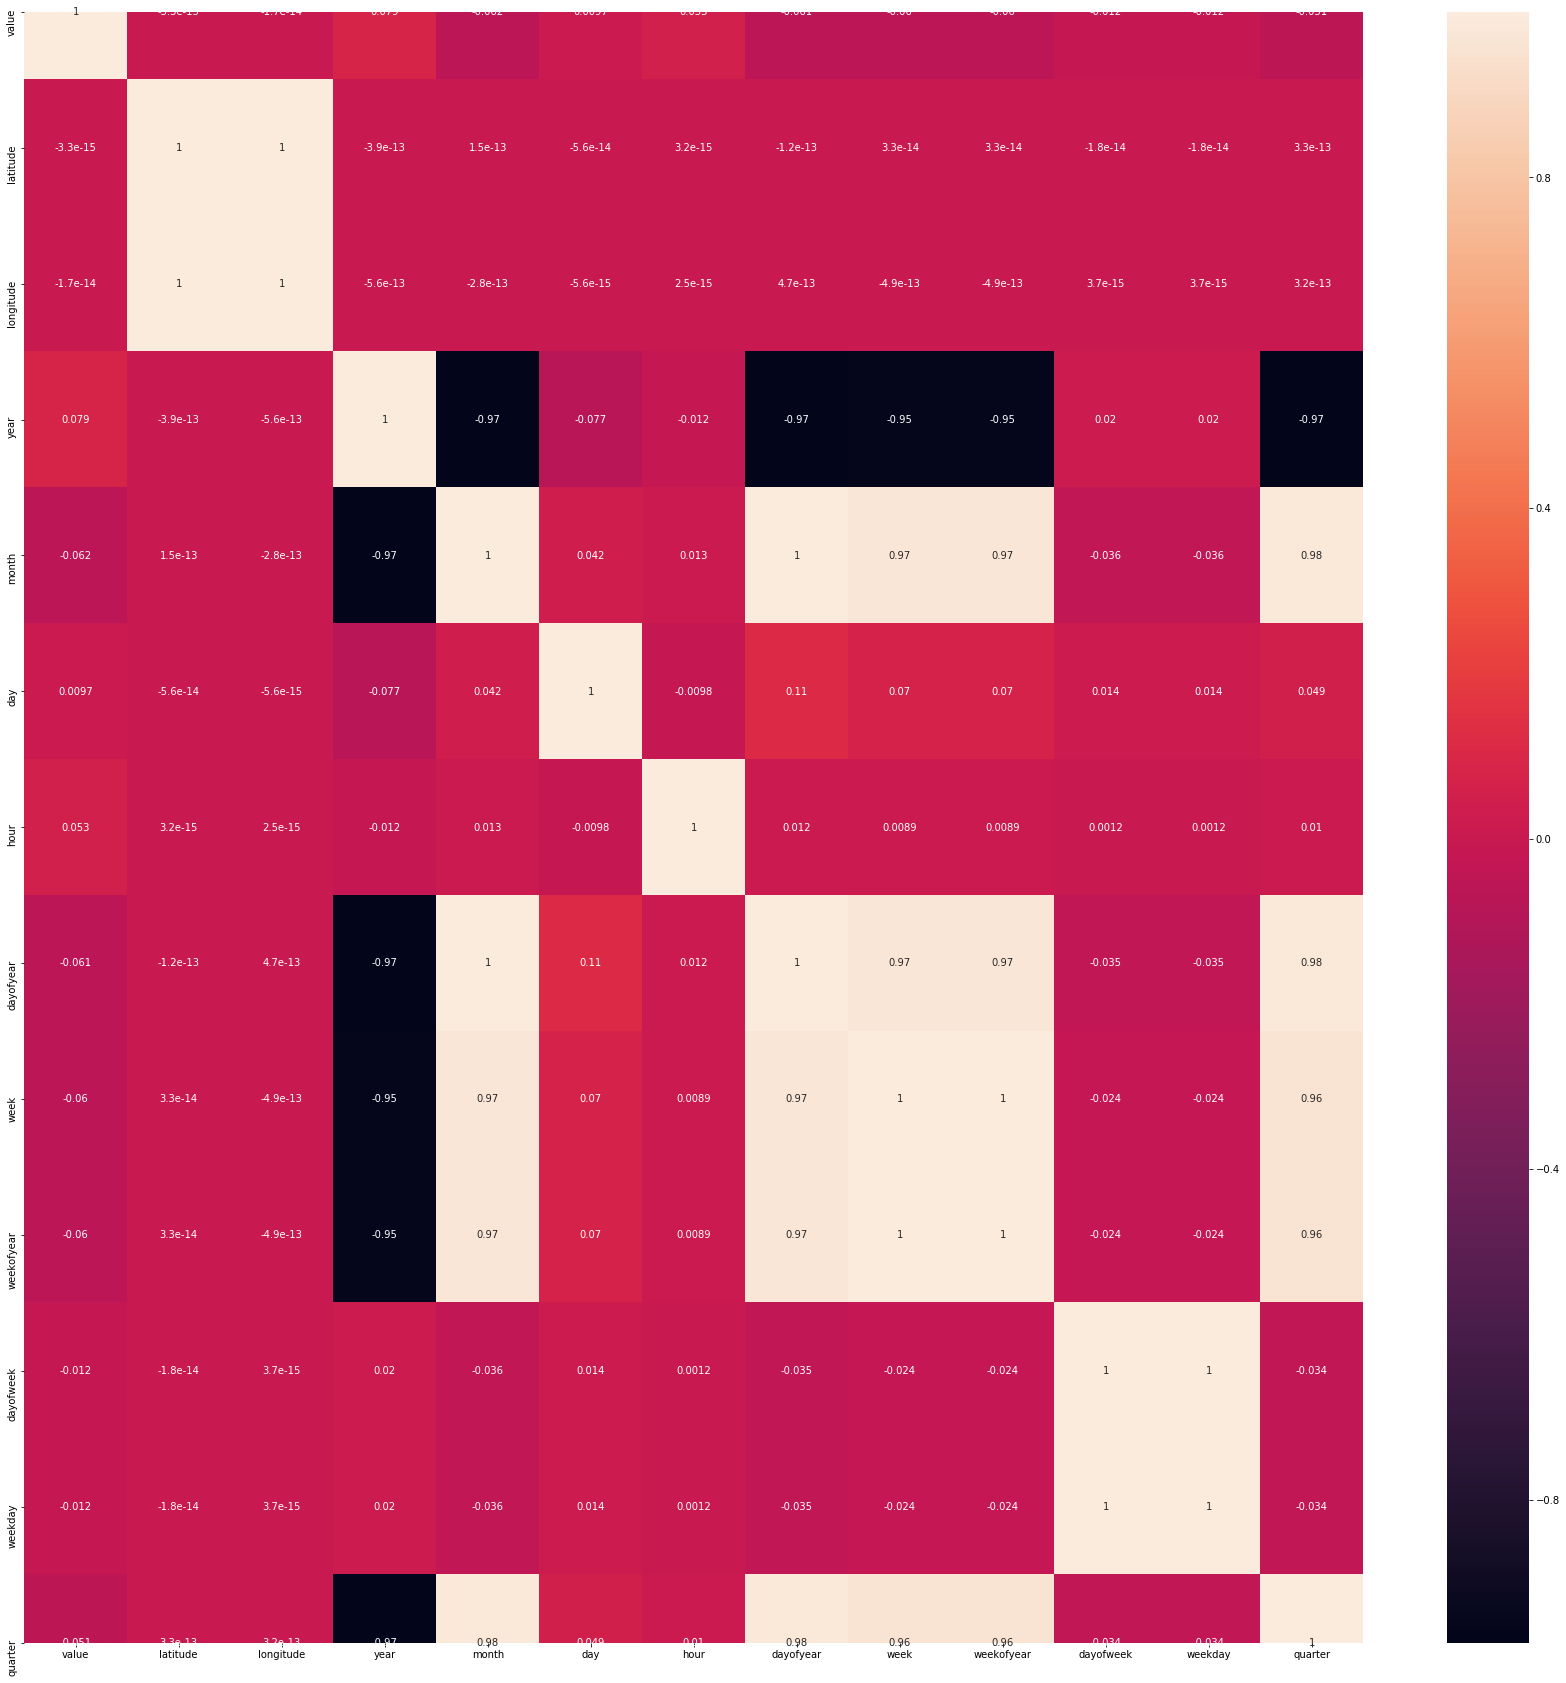

In [36]:
plt.figure(figsize=[30,30])
sns.heatmap(df.corr(),annot=True)

### Convert param like pm25,so2,co,no2,o3 into its numercals value like 1,2,3 and so on. So that ml possible for the data

In [37]:
df['int_parameter']=pd.factorize(df['parameter'])[0] + 1

In [38]:
X=df['value'].values
y=df['int_parameter'].values

In [39]:
X=X.reshape(-1,1)
y=y.reshape(-1,1)

### Scaling or normalizing the dataset

In [40]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [41]:
X=std.fit_transform(X)

### Splitting the dataset into training and testing

In [42]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=101)

### Training our model using Other  Classifier
 * Fitting Machine learning  algo and compare there training and testing score
 * To check Data underfitting or Overfitting the model by comparing there score.
      * In underfitting condition- model accuracy is very low.
      * In Overfitting condtion- training  accuracy is high but testing accuracy is exponentially low as compare to training. 
 * Chose the best algo suited for our model


In [43]:
lr=LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(max_depth=12)
ab = AdaBoostClassifier(n_estimators=70)
bc = BaggingClassifier()

In [44]:
ml_model = []
ml_model.append(("DecisionTreeClassifier",dt))
ml_model.append(("LogisticR",dt))
ml_model.append(('RandomForestClassifier',rf))
ml_model.append(('AdaBoost',ab))
ml_model.append(('Bagging',bc))


In [45]:
for name, algo in ml_model:
    algo.fit(train_x,train_y)
    train_score=algo.score(train_x,train_y)
    test_score = algo.score(test_x,test_y)
    msg = "%s = (training score): %f (testing score:) %f"%(name,train_score,test_score)
    print(msg)
    print('\n')


DecisionTreeClassifier = (training score): 0.878118 (testing score:) 0.871995


LogisticR = (training score): 0.878118 (testing score:) 0.871995




C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier = (training score): 0.796672 (testing score:) 0.795817




C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoost = (training score): 0.682003 (testing score:) 0.679261




C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:622: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Bagging = (training score): 0.877564 (testing score:) 0.871995




### Bagging perform well in our dataset  which is 87% training and 87% testing which is neither overfitting nor underfit the dataset

* Now predict the model using Bagging 

In [46]:
# Prediction
pred = bc.predict(test_x)


### Confusion matrix and classification report

In [47]:
from sklearn.metrics import confusion_matrix,classification_report

confusion_matrix(test_y,pred)

array([[2504,   86,    2,   13,   10],
       [  47, 2426,   77,   81,  142],
       [ 282,  236, 2250,    0,   73],
       [  75,    0,    0, 2298,    8],
       [  57,  261,  186,   41, 1946]], dtype=int64)

In [48]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           1       0.84      0.96      0.90      2615
           2       0.81      0.87      0.84      2773
           3       0.89      0.79      0.84      2841
           4       0.94      0.97      0.95      2381
           5       0.89      0.78      0.83      2491

   micro avg       0.87      0.87      0.87     13101
   macro avg       0.88      0.87      0.87     13101
weighted avg       0.87      0.87      0.87     13101



In [49]:
my_pred = pd.DataFrame(bc.predict(X),columns=['prediction'])

X = pd.DataFrame(X,columns=["value"])

### Final Result and submission of csv result prediction 

In [50]:
# Result or Prediction store in csv formate
pred = pd.concat([X,my_pred],1)
pred.to_csv('my_pred.csv',index=False)

In [51]:
pred.head()

,value,prediction
0,-0.289207,1
1,-0.358697,2
2,-0.298483,3
3,-0.290779,1
4,1.249945,4


AxesSubplot(0.125,0.125;0.775x0.755)


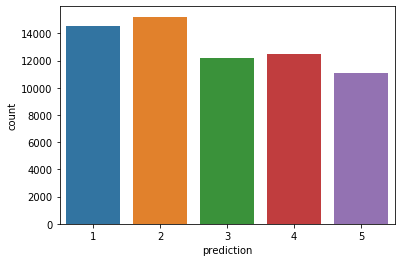

In [52]:
print(sns.countplot(pred['prediction']))

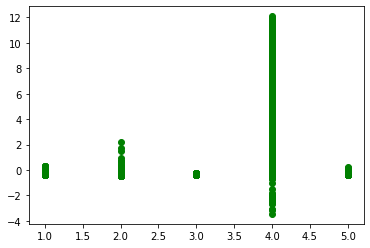

In [53]:
plt.scatter(pred['prediction'],pred['value'],color=['green'])